In [39]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')
%matplotlib inline

In [37]:
print(plt.style.available)

['seaborn-dark', 'seaborn-pastel', 'grayscale', 'seaborn-talk', 'seaborn-darkgrid', 'ggplot', 'seaborn-notebook', 'seaborn-poster', 'seaborn-paper', 'dark_background', 'bmh', 'seaborn-bright', 'fivethirtyeight', 'seaborn-dark-palette', 'classic', 'seaborn-muted', 'seaborn-ticks', 'seaborn-whitegrid', 'seaborn-colorblind', 'seaborn-deep', 'seaborn-white']


# Data Aggregations
As we have seen in several of the previous calculations and visualizations that we wanted to implement, the data that we have imported per month is very noisy, therefore we have to work a bit with it so that it is more smooth.

We have two options:
1. Group the data by year
2. Interpolate the missing values and apply some smoothing

We will start by grouping the data by year.

In [64]:
wordMonths = pd.read_csv('Data/3kplusWordMonth.csv',index_col=0)
wordMonths.head()

,-a,-la,-le,-on,-—,aarau,aarberg,aarbourg,aarcorp,aarg,...,œcuménique,œcuménisme,œdipe,œil,œillet,œquo,œrlikon,œuf,œur-,œuvre
1806-05-01,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1806-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1806-07-01,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1806-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
1806-09-01,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
wordMonths.index = pd.to_datetime(wordMonths.index)
wordMonths = wordMonths.groupby(wordMonths.index,level=0).agg(sum)
wordMonths.shape

(2351, 45149)

We first want to change the index to only display the year.

In [69]:
wordMonths.index = wordMonths.index.map(lambda x: x.year)
wordMonths.head()

,-a,-la,-le,-on,-—,aarau,aarberg,aarbourg,aarcorp,aarg,...,œcuménique,œcuménisme,œdipe,œil,œillet,œquo,œrlikon,œuf,œur-,œuvre
1798,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
wordYear = wordMonths.groupby(axis=0,by='index',level=0).agg(sum)
wordYear.head()

,-a,-la,-le,-on,-—,aarau,aarberg,aarbourg,aarcorp,aarg,...,œcuménique,œcuménisme,œdipe,œil,œillet,œquo,œrlikon,œuf,œur-,œuvre
1798,0.0,0.0,8.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,4.0
1799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,6.0
1804,0.0,0.0,14.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,2.0,0.0,18.0
1805,0.0,4.0,9.0,4.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,16.0
1806,3.0,0.0,12.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,26.0


In [71]:
wordYear.index = pd.to_datetime(wordYear.index,format='%Y')
index = wordYear.index
wordYear.head()

,-a,-la,-le,-on,-—,aarau,aarberg,aarbourg,aarcorp,aarg,...,œcuménique,œcuménisme,œdipe,œil,œillet,œquo,œrlikon,œuf,œur-,œuvre
1798-01-01,0.0,0.0,8.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,4.0
1799-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,6.0
1804-01-01,0.0,0.0,14.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,2.0,0.0,18.0
1805-01-01,0.0,4.0,9.0,4.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,16.0
1806-01-01,3.0,0.0,12.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,26.0


Let's take a look at the new time series.

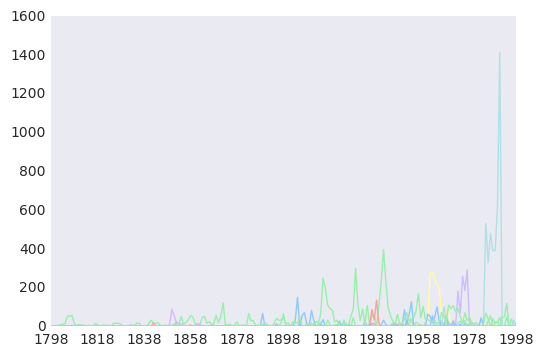

In [72]:
for i in range(26030,26040):
    plt.plot_date(index,wordYear[wordYear.columns[i]],'-')

In [73]:
wordYear.to_csv('Data/3kPluswordPerYear.csv')

We can see that the dataset is a bit better when we group the data by year, but it's still quite noise.

We will apply a smoothing function to make the curves a little bit smoother so that it is easier to work with them. We apply a rolling mean, with a 3 point window size.

In [59]:
rollingYear = wordYear.rolling(window=3).mean()

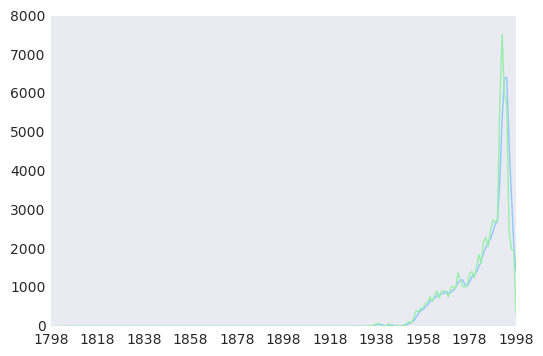

In [60]:
plt.plot_date(index,rollingYear['week-end'],'-')
plt.plot_date(index,wordYear['week-end'],'-')